In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
tf.random.set_seed(3)

In [15]:
import cv2
from PIL import Image

In [6]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [7]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [9]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

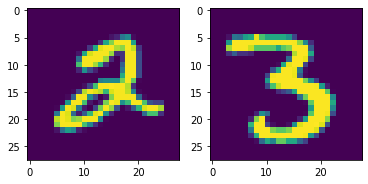

In [21]:
plt.subplot(1,2,1)
img = Image.fromarray(X_train[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_train[12])
plt.imshow(img)

Setting up the Layers of NN

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(60,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
                        ])

In [25]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [26]:
history = model.fit(X_train,Y_train,validation_split=0.25,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 14s 7ms/step - loss: 0.8765 - accuracy: 0.7227 - val_loss: 0.4994 - val_accuracy: 0.8439
Epoch 2/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4634 - accuracy: 0.8599 - val_loss: 0.3870 - val_accuracy: 0.8809
Epoch 3/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3946 - accuracy: 0.8807 - val_loss: 0.3635 - val_accuracy: 0.8853
Epoch 4/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3669 - accuracy: 0.8878 - val_loss: 0.3682 - val_accuracy: 0.8871
Epoch 5/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3508 - accuracy: 0.8944 - val_loss: 0.3128 - val_accuracy: 0.9037
Epoch 6/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3567 - accuracy: 0.8914 - val_loss: 0.3291 - val_accuracy: 0.9018
Epoch 7/30
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3300 - accuracy: 0.9002 - val_loss: 0.3076 - val_accuracy

In [27]:
loss,metrics = model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2479 - accuracy: 0.9265


1 9


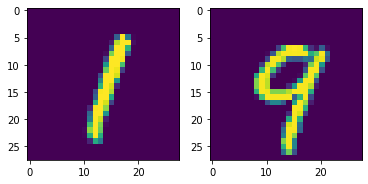

In [30]:
plt.subplot(1,2,1)
img = Image.fromarray(X_test[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_test[12])
plt.imshow(img)
print(Y_test[5],Y_test[12])

In [31]:
test_pred = model.predict(X_test)

In [32]:
Y_arg_max_list = [np.argmax(i) for i in test_pred]

In [34]:
Y_arg_max_list[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [36]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_arg_max_list)
print(cnf_matrix)

[[ 949    0    0    4    1   12    8    4    2    0]
 [   0 1119    0    4    1    2    3    1    5    0]
 [  13    1  924   32    9    4    9   13   24    3]
 [   4    5   18  909    1   42    1   12   13    5]
 [   1    2    5    1  918    1    9    1    6   38]
 [   8    2    0   16    3  829   11    0   16    7]
 [  10    3    6    1   11   19  904    0    4    0]
 [   0    8   13   13    3    5    0  959    2   25]
 [   7    5    3   48    8   42    5    7  837   12]
 [   6    8    0   12   29   16    1    9   11  917]]


Text(0.5, 69.0, 'Predicted Labels')

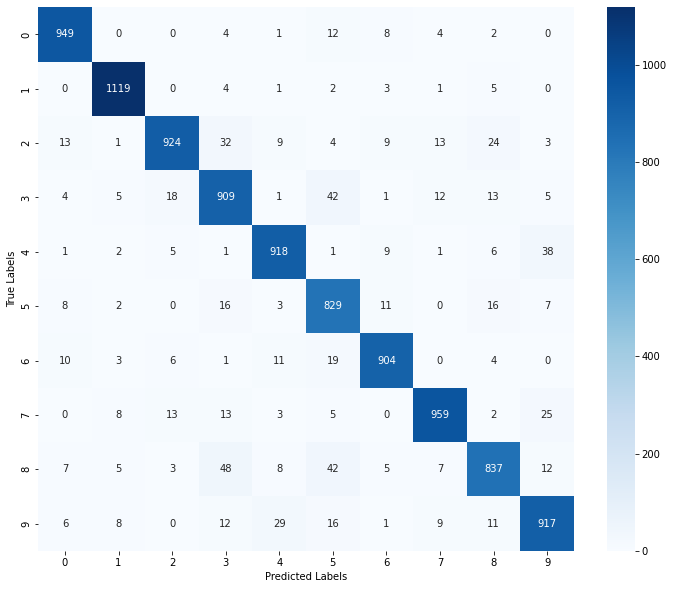

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(cnf_matrix,annot=True,cmap ='Blues',fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')